<a href="https://colab.research.google.com/github/edmondweb/Dataset_datascience/blob/main/Edmond_DataScience_interview_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science Inteview

In [20]:
!git clone https://github.com/madhur02/Dataset_datascience.git

fatal: destination path 'Dataset_datascience' already exists and is not an empty directory.


In [21]:
!git clone https://github.com/madhur02/Dataset_datascience.git
import pandas as pd
import numpy as np
sales_data = pd.read_csv("/content/Dataset_datascience/SalesDataAnalysis.csv")
sales_data.head()

fatal: destination path 'Dataset_datascience' already exists and is not an empty directory.


,Customer_ID,Order ID,Product Category,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City,Hour,Time of Day
0,0,295665,Laptops and Computers,Macbook Pro Laptop,1,"$1,700.00",30-12-2019 00:01,"136 Church St, New York City, NY 10001","$1,700.00",New York City,0,Night
1,1,295666,Home Appliances,LG Washing Machine,1,$600.00,29-12-2019 07:03,"562 2nd St, New York City, NY 10001",$600.00,New York City,7,Morning
2,2,295667,Charging Cables,USB-C Charging Cable,1,$11.95,12-12-2019 18:21,"277 Main St, New York City, NY 10001",$11.95,New York City,18,Evening
3,3,295668,Monitors,27in FHD Monitor,1,$149.99,22-12-2019 15:13,"410 6th St, San Francisco, CA 94016",$149.99,San Francisco,15,Afternoon
4,4,295669,Charging Cables,USB-C Charging Cable,1,$11.95,18-12-2019 12:38,"43 Hill St, Atlanta, GA 30301",$11.95,Atlanta,12,Afternoon


In [22]:
sales_data.head()

,Customer_ID,Order ID,Product Category,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City,Hour,Time of Day
0,0,295665,Laptops and Computers,Macbook Pro Laptop,1,"$1,700.00",30-12-2019 00:01,"136 Church St, New York City, NY 10001","$1,700.00",New York City,0,Night
1,1,295666,Home Appliances,LG Washing Machine,1,$600.00,29-12-2019 07:03,"562 2nd St, New York City, NY 10001",$600.00,New York City,7,Morning
2,2,295667,Charging Cables,USB-C Charging Cable,1,$11.95,12-12-2019 18:21,"277 Main St, New York City, NY 10001",$11.95,New York City,18,Evening
3,3,295668,Monitors,27in FHD Monitor,1,$149.99,22-12-2019 15:13,"410 6th St, San Francisco, CA 94016",$149.99,San Francisco,15,Afternoon
4,4,295669,Charging Cables,USB-C Charging Cable,1,$11.95,18-12-2019 12:38,"43 Hill St, Atlanta, GA 30301",$11.95,Atlanta,12,Afternoon




```
# This is formatted as code
```

## Question 1: How much revenue was generated from the three top-selling product categories?






In [23]:
# Convert 'Price Each' and 'Sales' to numeric, handling errors and cleaning
sales_data['Price Each'] = sales_data['Price Each'].astype(str).str.replace('[$,]', '', regex=True)
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'], errors='coerce')

sales_data['Sales'] = sales_data['Sales'].astype(str).str.replace('[$,]', '', regex=True)
sales_data['Sales'] = pd.to_numeric(sales_data['Sales'], errors='coerce')


# Calculate total revenue for each product category
category_revenue = sales_data.groupby('Product Category')['Sales'].sum()

# Get the top 3 product categories by sales
top_3_categories_revenue = category_revenue.sort_values(ascending=False).head(3)

# Print the result
print("Revenue generated from the three top-selling product categories:")
print(top_3_categories_revenue)

Revenue generated from the three top-selling product categories:
Product Category
Laptops and Computers     12124258.81
Phones and Accessories     8907200.00
Monitors                   5940840.98
Name: Sales, dtype: float64


## Question 2: What percentage of overall Sales do each of the categories contribute in 2019?

In [24]:
# Convert 'Order Date' to datetime objects if not already done
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], format='%d-%m-%Y %H:%M')

# Filter data for the year 2019
sales_2019 = sales_data[sales_data['Order Date'].dt.year == 2019].copy()

# Calculate total sales for each product category in 2019
category_sales_2019 = sales_2019.groupby('Product Category')['Sales'].sum()

# Calculate overall sales in 2019
overall_sales_2019 = sales_2019['Sales'].sum()

# Calculate the percentage contribution of each category
category_percentage_2019 = (category_sales_2019 / overall_sales_2019) * 100

# Print the results
print("Percentage of overall sales contributed by each category in 2019:")
print(category_percentage_2019.sort_values(ascending=False))

Percentage of overall sales contributed by each category in 2019:
Product Category
Laptops and Computers     35.751702
Phones and Accessories    26.266260
Monitors                  17.521423
Audio Devices             11.591244
Entertainment Devices      4.243991
Home Appliances            2.318444
Charging Cables            1.862103
Batterie                   0.444832
Name: Sales, dtype: float64


## Question 3:  Which product category shows the widest price range of products?


In [25]:
# Calculate the minimum and maximum price for each product category
price_range_by_category = sales_data.groupby('Product Category')['Price Each'].agg(['min', 'max'])

# Calculate the price range for each category
price_range_by_category['Price Range'] = price_range_by_category['max'] - price_range_by_category['min']

# Find the product category with the widest price range
widest_price_range_category = price_range_by_category.sort_values(by='Price Range', ascending=False).head(1)

# Print the result
print("Product category with the widest price range:")
print(widest_price_range_category)

Product category with the widest price range:
                          min     max  Price Range
Product Category                                  
Laptops and Computers  999.99  4700.0      3700.01


## Question 4: Plot the Sales trend for iPhone on a Monthly basis.

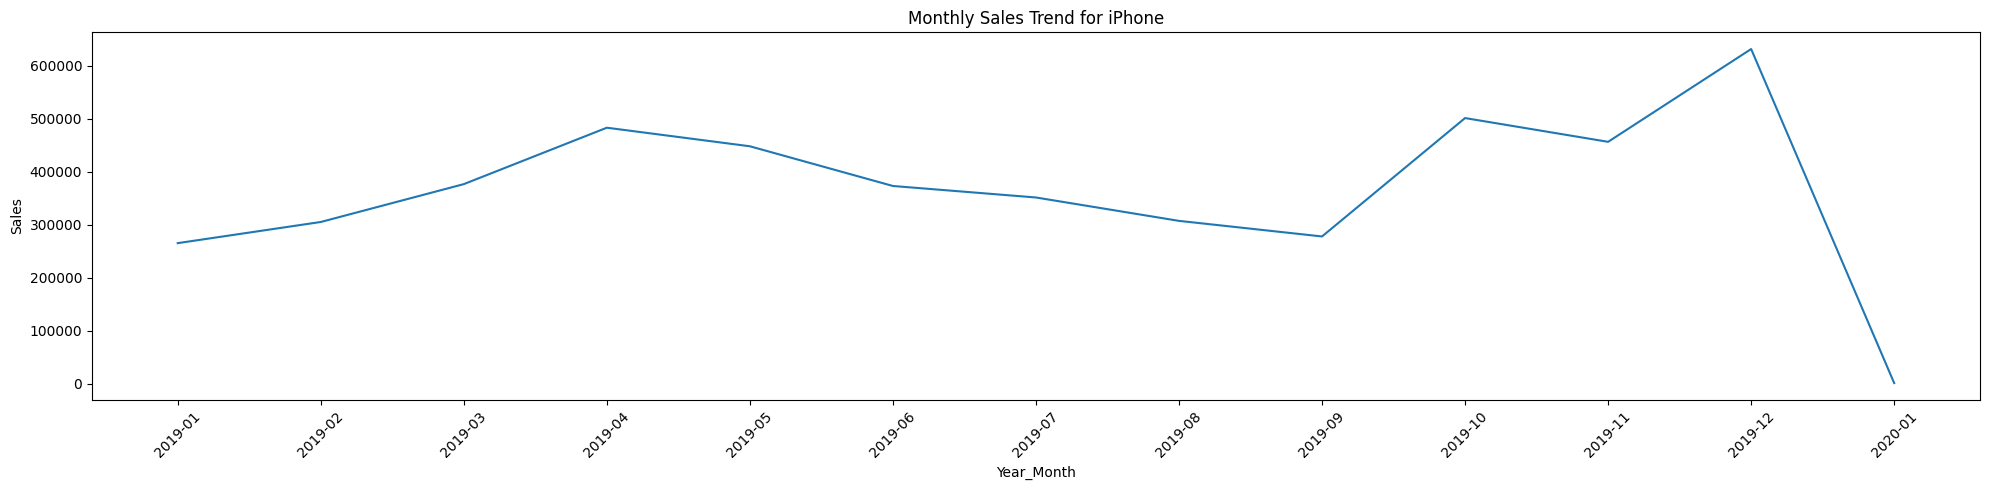

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for iPhone
iphone_sales = sales_data[sales_data['Product'] == 'iPhone'].copy()

# Convert 'Order Date' to datetime objects
iphone_sales['Order Date'] = pd.to_datetime(iphone_sales['Order Date'], format='%d-%m-%Y %H:%M')

# Extract Year and Month
iphone_sales['Year_Month'] = iphone_sales['Order Date'].dt.to_period('M')

# Group by Year_Month and sum Sales
monthly_iphone_sales = iphone_sales.groupby('Year_Month')['Sales'].sum()

# Plot the sales trend
plt.figure(figsize=(20, 5))
sns.lineplot(x=monthly_iphone_sales.index.astype(str), y=monthly_iphone_sales.values)
plt.xlabel('Year_Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend for iPhone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Question 5: For every city, list the products that have not yet been sold in that city.

In [27]:
# Get all unique products and cities
all_products = sales_data['Product'].unique()
all_cities = sales_data['City'].unique()

# Create a dictionary to store products not sold in each city
products_not_sold_by_city = {}

# Iterate through each city
for city in all_cities:
    # Get the products sold in the current city
    products_sold_in_city = sales_data[sales_data['City'] == city]['Product'].unique()

    # Find products that are in all_products but not in products_sold_in_city
    products_not_sold = set(all_products) - set(products_sold_in_city)

    # Store the result in the dictionary
    products_not_sold_by_city[city] = list(products_not_sold)

# Print the results
for city, products in products_not_sold_by_city.items():
    print(f"Products not sold in {city}:")
    if products:
        for product in products:
            print(f"- {product}")
    else:
        print("- All products have been sold in this city.")
    print("-" * 20)

Products not sold in  New York City:
- Robotic Vacuum Cleaner
- Sandwich Maker
- Projector
- Calculator
- Rice Cooker
- Reading Lamp
--------------------
Products not sold in  San Francisco:
- Sandwich Maker
- Dvd player
- Projector
- Calculator
- Rice Cooker
- Reading Lamp
--------------------
Products not sold in  Atlanta:
- Robotic Vacuum Cleaner
- Dvd player
- Projector
- Calculator
- Rice Cooker
- Reading Lamp
--------------------
Products not sold in  Portland:
- Robotic Vacuum Cleaner
- Dvd player
- Sandwich Maker
- Projector
- Calculator
- Rice Cooker
- Reading Lamp
--------------------
Products not sold in  Dallas:
- Robotic Vacuum Cleaner
- Dvd player
- Sandwich Maker
- Projector
- Calculator
- Rice Cooker
--------------------
Products not sold in  Los Angeles:
- Robotic Vacuum Cleaner
- Dvd player
- Sandwich Maker
- Calculator
- Rice Cooker
- Reading Lamp
--------------------
Products not sold in  Austin:
- Robotic Vacuum Cleaner
- Dvd player
- Sandwich Maker
- Projector
- C

## Question 6: List the top 3 cities in terms of the number of orders for each time of the day (Morning/Afternoon/Evening/Night).

In [28]:
# Group by Time of Day and City, and count the number of orders
city_orders_by_time = sales_data.groupby(['Time of Day', 'City']).size().reset_index(name='Number of Orders')

# Get the top 3 cities for each Time of Day
top_cities_by_time = city_orders_by_time.groupby('Time of Day').apply(lambda x: x.nlargest(3, 'Number of Orders')).reset_index(drop=True)

# Print the results
print("Top 3 cities by number of orders for each time of the day:")
print(top_cities_by_time)

Top 3 cities by number of orders for each time of the day:
   Time of Day            City  Number of Orders
0    Afternoon   San Francisco             15042
1    Afternoon     Los Angeles              9913
2    Afternoon   New York City              8348
3      Evening   San Francisco             14153
4      Evening     Los Angeles              9503
5      Evening   New York City              7861
6      Morning   San Francisco             10083
7      Morning     Los Angeles              6609
8      Morning   New York City              5618
9        Night   San Francisco              2421
10       Night     Los Angeles              1563
11       Night   New York City              1379


/tmp/ipython-input-333963138.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_cities_by_time = city_orders_by_time.groupby('Time of Day').apply(lambda x: x.nlargest(3, 'Number of Orders')).reset_index(drop=True)


## Question 7: Find the top 3 customers by Sales.

In [29]:
## Write your code here..
# Group by Customer_ID and sum the sales for each customer
customer_sales = sales_data.groupby('Customer_ID')['Sales'].sum()

# Sort the customers by sales in descending order and get the top 3
top_3_customers = customer_sales.sort_values(ascending=False).head(3)

# Print the top 3 customers by sales
print("Top 3 customers by Sales:")
print(top_3_customers)

Top 3 customers by Sales:
Customer_ID
2190    8153.80
8648    8018.85
7109    7800.77
Name: Sales, dtype: float64
